In [1]:
# -------------------------------
# 1. Import required libraries
# -------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# -------------------------------
# 2. Load the dataset
# -------------------------------
df = pd.read_csv("Seoul_Accidents.csv")

In [3]:
# -------------------------------
# 3. Rename columns to English
# -------------------------------
df = df.rename(columns={
    "발생일": "Date",
    "발생시간": "Hour",
    "발생지_시도": "City",
    "발생지_시군구": "District",
    "법정동명": "Neighborhood",
    "사고건수": "Accidents",
    "사망자수": "Fatalities",
    "중상자수": "Serious_Injuries",
    "경상자수": "Minor_Injuries",
    "부상신고자수": "Reported_Injuries"
})

In [8]:
# -------------------------------
# 3a. Map Korean District names to English
# -------------------------------
district_map = {
    "강남구": "Gangnam",
    "강동구": "Gangdong",
    "강북구": "Gangbuk",
    "강서구": "Gangseo",
    "관악구": "Gwanak",
    "광진구": "Gwangjin",
    "구로구": "Guro",
    "금천구": "Geumcheon",
    "노원구": "Nowon",
    "도봉구": "Dobong",
    "동대문구": "Dongdaemun",
    "동작구": "Dongjak",
    "마포구": "Mapo",
    "서대문구": "Seodaemun",
    "서초구": "Seocho",
    "성동구": "Seongdong",
    "성북구": "Seongbuk",
    "송파구": "Songpa",
    "양천구": "Yangcheon",
    "영등포구": "Yeongdeungpo",
    "용산구": "Yongsan",
    "은평구": "Eunpyeong",
    "종로구": "Jongno",
    "중구": "Jung",
    "중랑구": "Jungnang"
}

In [9]:
# Apply the mapping to the 'District' column
df["District"] = df["District"].replace(district_map)

In [31]:
# -------------------------------
# Map specific Neighborhoods to English
# -------------------------------
neighborhood_map = {
    "역삼동": "Yeoksam",
    "신림동": "Sillim",
    "서초동": "Seocho",
    "상계동": "Sanggye",
    "구로동": "Guro",
    "논현동": "Nonhyeon",
    "화곡동": "Hwagok",
    "면목동": "Myeonmok",
    "봉천동": "Bongcheon",
    "미아동": "Mia",
    "목동": "Mokdong",
    "잠실동": "Jamsil",
    "신정동": "Sinjeong",
    "반포동": "Banpo",
    "대치동": "Daechi"
}

In [32]:
# Apply the mapping
df["Neighborhood"] = df["Neighborhood"].replace(neighborhood_map)

In [33]:
# -------------------------------
# 4. Save cleaned dataset
# -------------------------------
df.to_csv("Seoul_Accidents_Cleaned.csv", index=False)

In [12]:
# -------------------------------
# 5. Visualization 
# -------------------------------

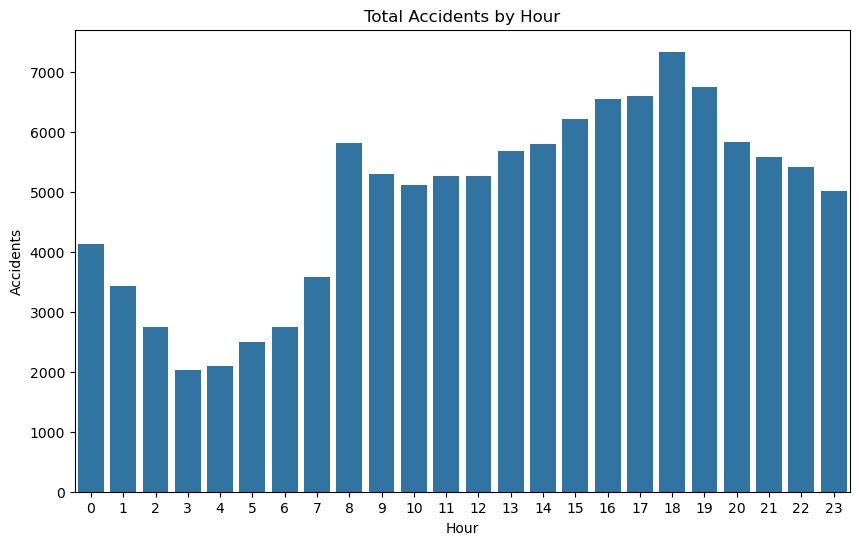

In [13]:
# 1: Accidents by Hour
plt.figure(figsize=(10,6))
sns.barplot(x="Hour", y="Accidents", data=df.groupby("Hour").sum().reset_index())
plt.title("Total Accidents by Hour")
plt.savefig("Accidents_by_Hour.png")
plt.show()

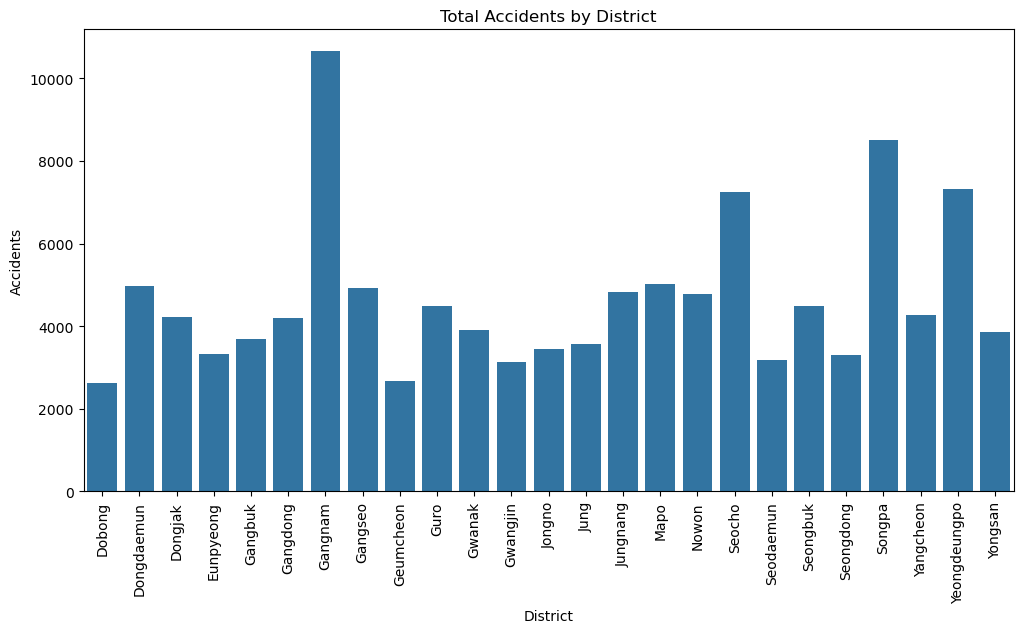

In [14]:
# 2: Accidents by District
plt.figure(figsize=(12,6))
sns.barplot(x="District", y="Accidents", data=df.groupby("District").sum().reset_index())
plt.xticks(rotation=90)
plt.title("Total Accidents by District")
plt.savefig("Accidents_by_District.png")
plt.show()

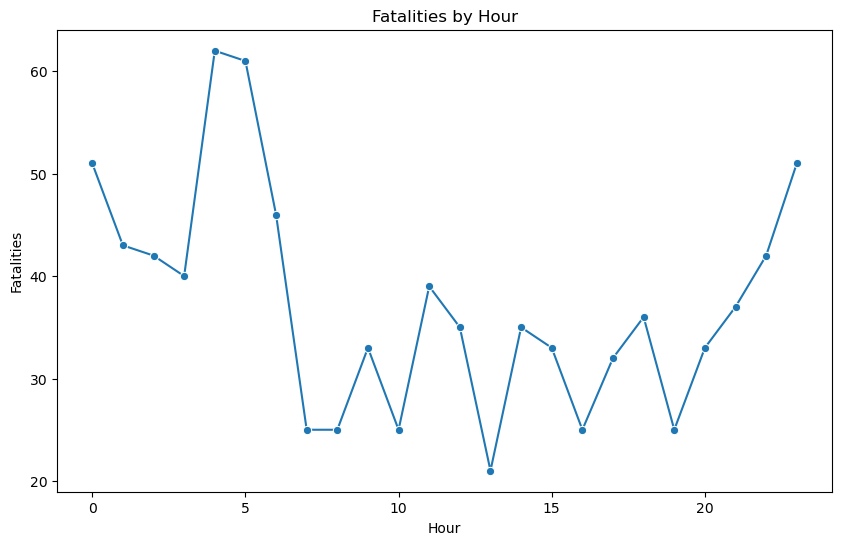

In [15]:
# 3: Fatalities by Hour
plt.figure(figsize=(10,6))
sns.lineplot(x="Hour", y="Fatalities", data=df.groupby("Hour").sum().reset_index(), marker="o")
plt.title("Fatalities by Hour")
plt.savefig("Fatalities_by_Hour.png")
plt.show()

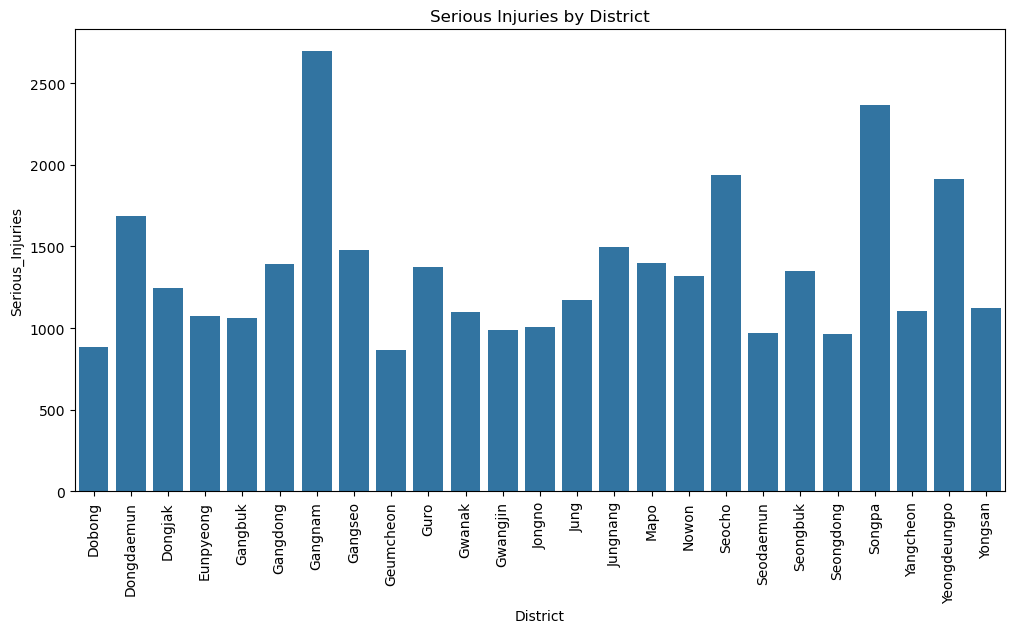

In [16]:
# 4: Serious Injuries by District
plt.figure(figsize=(12,6))
sns.barplot(x="District", y="Serious_Injuries", data=df.groupby("District").sum().reset_index())
plt.xticks(rotation=90)
plt.title("Serious Injuries by District")
plt.savefig("Serious_Injuries_by_District.png")
plt.show()

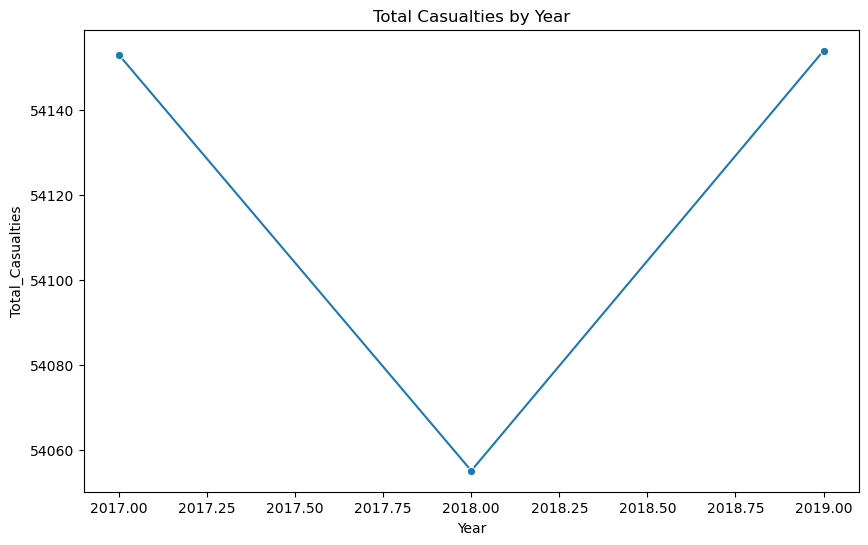

In [17]:
# 5: Casualties Trend by Year
df["Year"] = pd.to_datetime(df["Date"]).dt.year
df["Total_Casualties"] = df["Fatalities"] + df["Serious_Injuries"] + df["Minor_Injuries"] + df["Reported_Injuries"]

plt.figure(figsize=(10,6))
sns.lineplot(x="Year", y="Total_Casualties", data=df.groupby("Year").sum().reset_index(), marker="o")
plt.title("Total Casualties by Year")
plt.savefig("Casualties_by_Year.png")
plt.show()

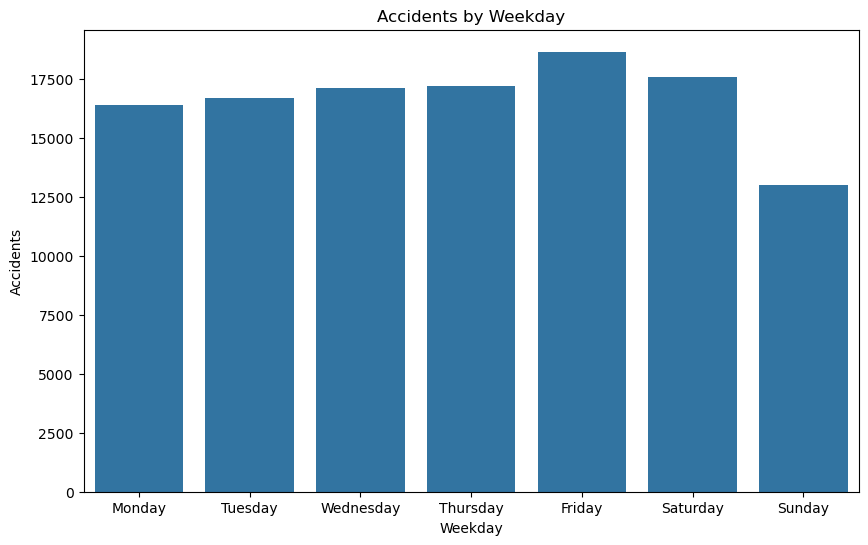

In [18]:
# 6: Accidents by Weekday
df["Weekday"] = pd.to_datetime(df["Date"]).dt.day_name()

plt.figure(figsize=(10,6))
sns.barplot(x="Weekday", y="Accidents", data=df.groupby("Weekday").sum().reset_index(),
            order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title("Accidents by Weekday")
plt.savefig("Accidents_by_Weekday.png")
plt.show()

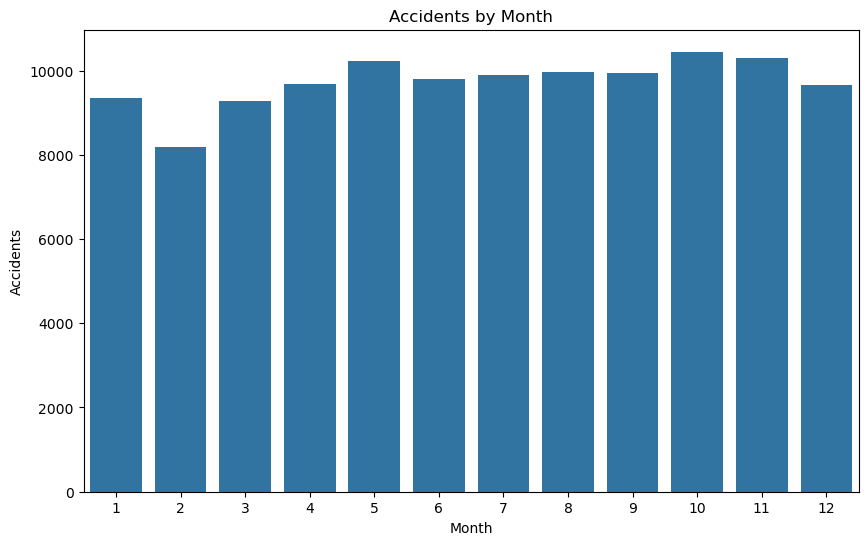

In [19]:
# 7: Accidents by Month
df["Month"] = pd.to_datetime(df["Date"]).dt.month

plt.figure(figsize=(10,6))
sns.barplot(x="Month", y="Accidents", data=df.groupby("Month").sum().reset_index())
plt.title("Accidents by Month")
plt.savefig("Accidents_by_Month.png")
plt.show()

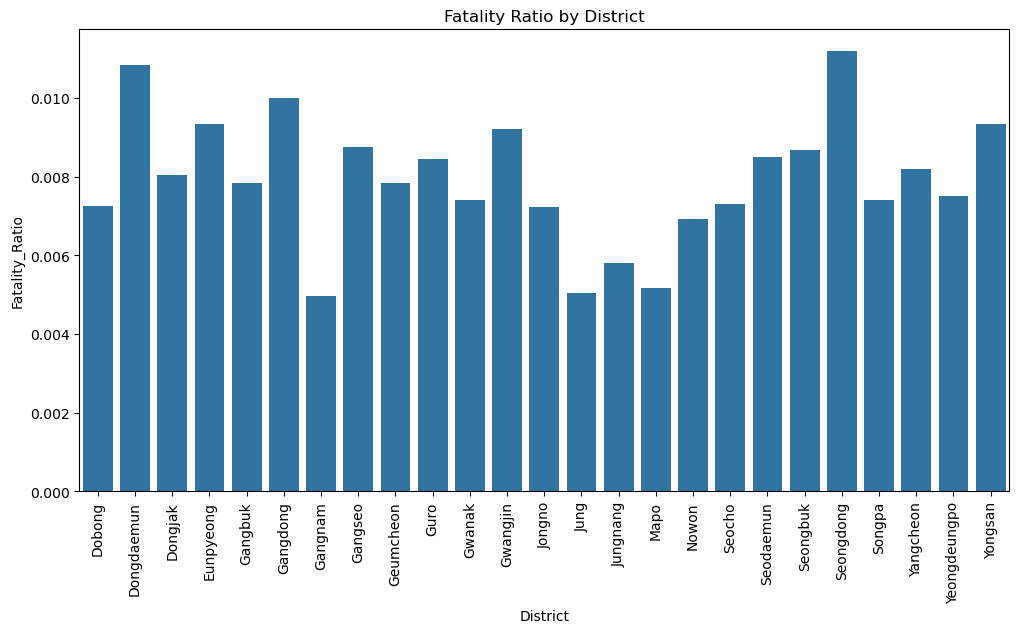

In [20]:
# 8: Fatality Ratio by District
fatality_ratio = df.groupby("District").sum().reset_index()
fatality_ratio["Fatality_Ratio"] = fatality_ratio["Fatalities"] / fatality_ratio["Accidents"]

plt.figure(figsize=(12,6))
sns.barplot(x="District", y="Fatality_Ratio", data=fatality_ratio)
plt.xticks(rotation=90)
plt.title("Fatality Ratio by District")
plt.savefig("Fatality_Ratio_by_District.png")
plt.show()

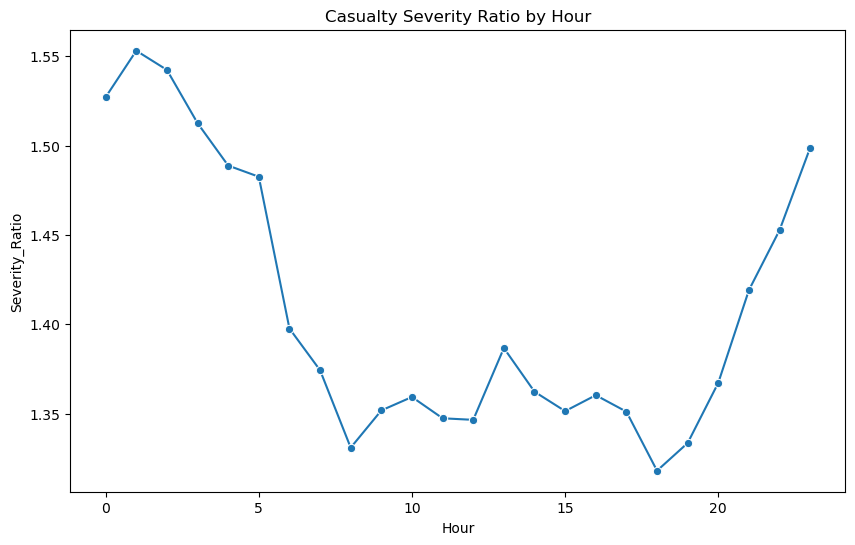

In [21]:
# 9: Casualty Severity Ratio by Hour
casualty_ratio = df.groupby("Hour").sum().reset_index()
casualty_ratio["Severity_Ratio"] = casualty_ratio["Total_Casualties"] / casualty_ratio["Accidents"]

plt.figure(figsize=(10,6))
sns.lineplot(x="Hour", y="Severity_Ratio", data=casualty_ratio, marker="o")
plt.title("Casualty Severity Ratio by Hour")
plt.savefig("Casualty_Severity_Ratio_by_Hour.png")
plt.show()

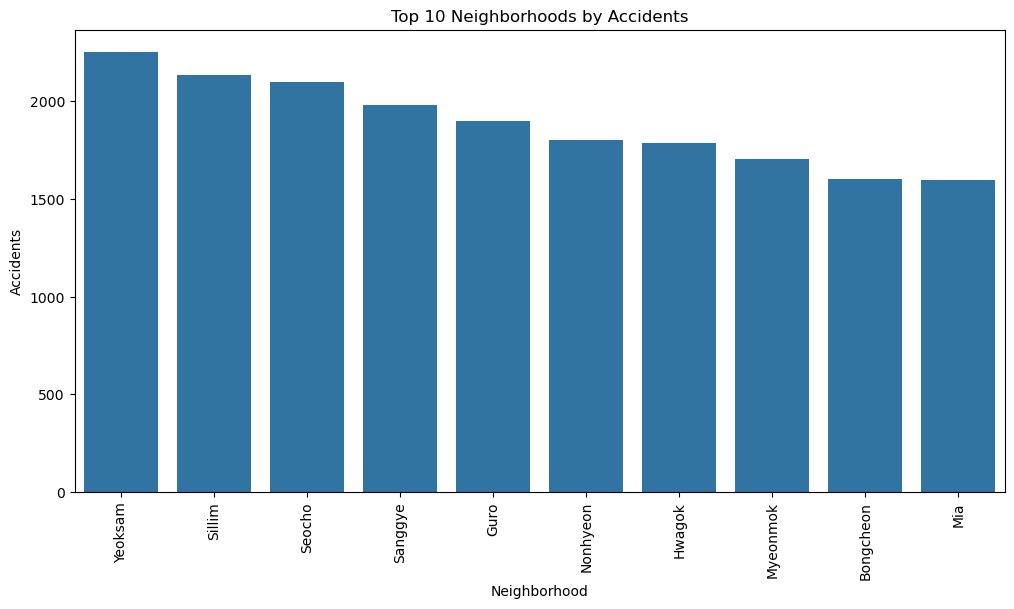

In [34]:
# 10: Top 10 Neighborhoods by Accidents
neighborhoods = df.groupby("Neighborhood").sum().reset_index().sort_values("Accidents", ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x="Neighborhood", y="Accidents", data=neighborhoods)
plt.xticks(rotation=90)
plt.title("Top 10 Neighborhoods by Accidents")
plt.savefig("Top10_Neighborhoods_by_Accidents.png")
plt.show()

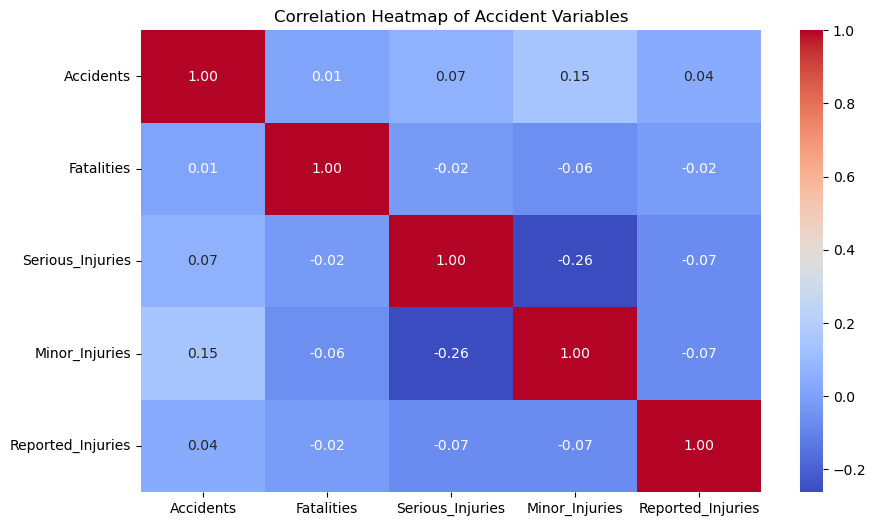

In [23]:
# 11.Correlation Between Accident Variables

plt.figure(figsize=(10,6))
sns.heatmap(df[["Accidents","Fatalities","Serious_Injuries","Minor_Injuries","Reported_Injuries"]].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Accident Variables")
plt.savefig("Correlation_Heatmap.png")
plt.show()

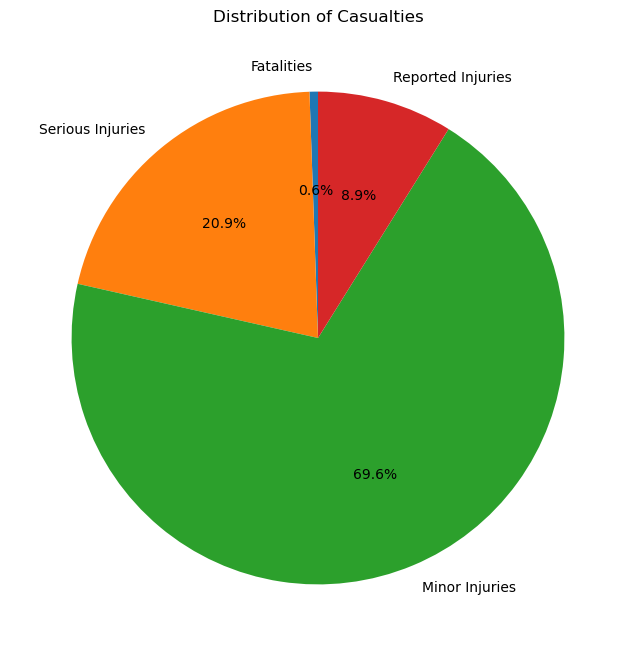

In [24]:
# 12. Distribution of Casualties (Fatalities vs Injuries)

casualty_totals = [
    df["Fatalities"].sum(),
    df["Serious_Injuries"].sum(),
    df["Minor_Injuries"].sum(),
    df["Reported_Injuries"].sum()
]
labels = ["Fatalities", "Serious Injuries", "Minor Injuries", "Reported Injuries"]

plt.figure(figsize=(8,8))
plt.pie(casualty_totals, labels=labels, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Casualties")
plt.savefig("Casualties_Distribution_Pie.png")
plt.show()

In [ ]:
من هذا الرشج ... لمشروع قيت هب ...اقترح اسم الربيو وهيكل المشروع من الداتا الاصلية وملف استعلامات ب 15 استعلام وملف كود بايثون للرسومات وتعديل الاعمدة بالانجليزية ....حاليا داشبورد بور ب اي قسد العمل .... بالخطوات العملناها سويا ومن شرح الصور الخارجه من بايثون الذي سارسله لك ....اككتب ريد مي احترافي ولغة انجليزية بسيطة ومفهومة وبتنسيق جاهز للنسخ والصق من غير اي تعديل .....دا شرح الرسومات ....ضمن بعض رسومات بايثون في الريد مي .....دا الرشح .....الرسم 1: مصفوفة الارتباط (Correlation Heatmap) بين متغيرات الحوادث

الأعمدة والصفوف: Injuries المختلفة
القيم داخل الخانات هي معاملات الارتباط بين المتغيرات، تتراوح من -0.26 حتى 1.00.
أبرز النقاط:
Accidents مع Fatalities: 0.01
Serious_Injuries مع Minor_Injuries: -0.26
Minor_Injuries مع Reported_Injuries: -0.07
Fatalities مع Serious_Injuries: -0.02
العلاقة الأقوى هي القيم الإيجابية القليلة بين بعض الأزواج، والعلاقة الأكثر سلبية بين Minor_Injuries و Serious_Injuries (-0.26).
الرسم 2: توزيع الإصابات حسب النوع (Pie chart)

الفئات: Minor Injurie، Serious Injuries، Fatalities، Reported Injuries
النسب التقريبية:
Minor Injuries: ~69.6%
Serious Injuries: ~20.9%
Reported Injuries: ~8.9%
Fatalities: ~0.6%
ملاحظة: النسب معروضة كـpercent على المقطع في الرسم.
الرسم 3: Top 10 Neighborhoods by Accidents (Bar chart)

عدد الحوادث لكل حي في عينة افتراضية: يتراوح تقريباً من 1600 إلى 2300 حادثة
القيم التقريبية:
الحي الأول: ~2300
الحي الثاني: ~2100
الحي الثالث: ~2100
الحي الرابع: ~1980
الحي الخامس: ~1900
الحي السادس: ~1800
الحي السابع: ~1780
الحي الثامن: ~1760
الحي التاسع: ~1700
الحي العاشر: ~1650
ملاحظة: الأعداد تقريبة مستمدة من ارتفاع الأعمدة.
الرسم 4: Casualty Severity Ratio by Hour (Line chart)

المحور الأفقي: الساعات من 0 إلى 23
المحور الرأسي: نسبة شدة الإصابة (Severity_Ratio)
القيم تقريبا:
الساعة 0: 1.53
الساعة 1: 1.55
الساعة 2: 1.50
الساعة 3: 1.46
الساعة 4: 1.44
الساعة 5: 1.40
الساعة 6: 1.34
الساعة 7: 1.33
الساعة 8: 1.35
الساعة 9: 1.39
الساعة 10: 1.37
الساعة 11: 1.36
الساعة 12: 1.39
الساعة 13: 1.36
الساعة 14: 1.35
الساعة 15: 1.36
الساعة 16: 1.33
الساعة 17: 1.32
الساعة 18: 1.37
الساعة 19: 1.40
الساعة 20: 1.44
الساعة 21: 1.46
الساعة 22: 1.50
الساعة 23: 1.50
ملاحظة: أرقام التقريب وفق النقاط المعروضة على الرسم.
الرسم 5: Fatality Ratio by District (Bar chart)

المحور الأفقي: المناطق/الدوائر (Districts)
المحور الرأسي: نسبة الوفيات (Fatality Ratio)
القيم عادة صغيرة جداً تتراوح بين 0.005 و0.011 تقريباً حسب الرسم.
الرسم 6: Accidents by Month (Bar chart)

المحور الأفقي: الأشهر (1-12)
المحور الرأسي: عدد الحوادث
القيم التقريبية:
شهر 1: ~9300
شهر 2: ~8200
شهر 3: ~9300
شهر 4: ~9700
شهر 5: ~10400
شهر 6: ~9900
شهر 7: ~9700
شهر 8: ~9900
شهر 9: ~9800
شهر 10: ~10100
شهر 11: ~9700
شهر 12: ~9600......Accidents by Weekday (الحوادث حسب اليوم)
الاثنين: 16500
الثلاثاء: 16700
الأربعاء: 17200
الخميس: 17400
الجمعة: 19000
السبت: 17500
الأحد: 13000
Total Casualties by Year (إجمالي الإصابات/الخسائر حسب السنة)
2017: 54500
2018: 53450
2019: 54550
Serious Injuries by District (الإصابات الخطيرة حسب المقاطعة/الحي)
قائمة بالمقاطعات: Dobong, Daegun, Dongjak, Dobong (تكرار)، …، Yongson
القيم لكل مقاطعة تظهر في الرسم لكن ليست مُدرجة رقمياً هنا بشكل موجز. إذا رغبت، أزوّدك بقائمة أرقام محددة لكل مقاطعة.
Fatalities by Hour (الوفيات حسب الساعة)
الساعة 0: 51
1: 43
2: 42
3: 40
4: 63
5: 61
6: 46
7: 25
8: 33
9: 29
10: 39
11: 35
12: 21
13: 35
14: 34
15: 33
16: 25
17: 32
18: 36
19: 25
20: 33
21: 37
22: 42
23: 51 .......الرسم الأول: "Total Accidents by District" (إجمالي الحوادث لكل منطقة)

المناطق مرتبة على المحور الأفقي من اليسار إلى اليمين: Dabong، Daemmun، Dongjak، Yongsan، Kangnam، Songpa، … وصولاً إلى Yongsan؟ (الاسماء تظهر مكررة في الصورة، لكن تُقرأ من اليسار إلى اليمين كما هي في الرسم).
عدد الحوادث لكل منطقة تقريبي كما يلي (من اليسار إلى اليمين تقريباً):
Dabong: ~2500
Daemmun: ~4200
Dongjak: ~3500
Yongsan: ~3800
Kangnam: ~4000
Songpa: ~10000+ (الأعلى تقريباً ~10500)
Gangnam: ~4800
Nowon: ~2900
… (النمط يتكرر وتكون القيم تتفاوت حتى ~8500 في المناطق الأعلى مثل Songpa وGangnam وSeoul)
ملاحظة: القيم الدقيقة غير واضحة من الصورة المنفردة بسبب جودة الرسم وتكرار الأسماء، لكن الاتجاه العام يظهر أن Songpa وGangnam وSeoul مناطق الأعلى في الحوادث.
الرسم الثاني: "Total Accidents by Hour" (إجمالي الحوادث لكل ساعة)

المحور الأفقي يمثل ساعات اليوم من 0 إلى 23.
القيم التقريبية لعدد الحوادث في كل ساعة:
0: ~4100
1: ~3400
2: ~2800
3: ~2100
4: ~2100
5: ~2600
6: ~2700
7: ~3600
8: ~5800
9: ~5400
10: ~5200
11: ~5200
12: ~5700
13: ~5900
14: ~6200
15: ~6500
16: ~6600
17: ~7200
18: ~6700
19: ~5800
20: ~5600
21: ~5400
22: ~5400
23: ~5000
>>>>> "Top 10 Neighborhoods by Accidents" أي أكثر 10 أحياء من حيث عدد الحوادث. القيم التقديرية للعدد الكلي للحوادث لكل حي كالتالي:

Kotsam: حوالي 2300 حادثة
Siliim: حوالي 2100 حادثة
Seoch0: حوالي 2100 حادثة (تقريباً ندوة وهو الأقرب لـ 2100-2110)
Yangyo: حوالي 1980-2000 حادثة
Guro: حوالي 1900 حادثة
Hyeonyon: حوالي 1800 حادثة
Wagok: حوالي 1780-1800 حادثة
Nomok: حوالي 1700 حادثة
Hachen: حوالي 1600 حادثة
Mia: حوالي 1590-1600 حادثة
ملاحظات:

المحور y يمثل عدد الحوادث (Accidents).
المحور x يعرض أسماء الأحياء العشر الأوائل.
القيم تقريبية مبنية على طول الأعمدة في الرسم.